# Preprocessing

## Imports and their dependencies

### Dependencies

In [1]:
# !pip install tensorflow
# !pip install -U tensorflow
# !python -m pip show tensorflow

### Imports

In [18]:
'''Imports'''

# for data
import pandas as pd
import numpy as np
import re
from datetime import datetime
import ast
import time
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn import metrics, preprocessing


## Creating product matrix

### Loading in product data and doing some initial preprocessing

In [50]:
keywords_df = pd.read_csv("keywords_expanded.csv")
metadata_df = pd.read_csv("metadata_expanded.csv")

C:\Users\rache\AppData\Local\Temp\ipykernel_23676\655616569.py:1: DtypeWarning: Columns (55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,197,199,201,203,205,207,209,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271,273,275,277,279,281,283,285,287,289,291,293,295,297,299) have mixed types. Specify dtype option on import or set low_memory=False.
  keywords_df = pd.read_csv("keywords_expanded.csv")
C:\Users\rache\AppData\Local\Temp\ipykernel_23676\655616569.py:2: DtypeWarning: Columns (20,38) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv("metadata_expanded.csv")


In [51]:
keywords_df.head()

,Unnamed: 0,id,keyword_id_1,keyword_name_1,keyword_id_2,keyword_name_2,keyword_id_3,keyword_name_3,keyword_id_4,keyword_name_4,...,keyword_id_145,keyword_name_145,keyword_id_146,keyword_name_146,keyword_id_147,keyword_name_147,keyword_id_148,keyword_name_148,keyword_id_149,keyword_name_149
0,0,1,931.0,jealousy,4290.0,toy,5202.0,boy,6054.0,friendship,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,1495.0,fishing,12392.0,best friend,179431.0,duringcreditsstinger,208510.0,old men,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4,818.0,based on novel,10131.0,interracial relationship,14768.0,single mother,15160.0,divorce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5,1009.0,baby,1599.0,midlife crisis,2246.0,confidence,4995.0,aging,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,642.0,robbery,703.0,detective,974.0,bank,1523.0,obsession,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Not sure what happended with this keywords dataframe, and am going to delete from the 11th keyword column to the 149th, and this "Unamed: 0" column.

In [52]:
for i in range(11, 150):
    keywords_df = keywords_df.drop(columns = f'keyword_id_{i}', axis = 0)
    keywords_df = keywords_df.drop(columns = f'keyword_name_{i}', axis = 0)

In [53]:
keywords_df = keywords_df.drop(columns = 'Unnamed: 0', axis = 0)
keywords_df.head()

,id,keyword_id_1,keyword_name_1,keyword_id_2,keyword_name_2,keyword_id_3,keyword_name_3,keyword_id_4,keyword_name_4,keyword_id_5,...,keyword_id_6,keyword_name_6,keyword_id_7,keyword_name_7,keyword_id_8,keyword_name_8,keyword_id_9,keyword_name_9,keyword_id_10,keyword_name_10
0,1,931.0,jealousy,4290.0,toy,5202.0,boy,6054.0,friendship,9713.0,...,9823.0,rivalry,165503.0,boy next door,170722.0,new toy,187065.0,toy comes to life,NaN,NaN
1,3,1495.0,fishing,12392.0,best friend,179431.0,duringcreditsstinger,208510.0,old men,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,818.0,based on novel,10131.0,interracial relationship,14768.0,single mother,15160.0,divorce,33455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1009.0,baby,1599.0,midlife crisis,2246.0,confidence,4995.0,aging,5600.0,...,10707.0,mother daughter relationship,13149.0,pregnancy,33358.0,contraception,170521.0,gynecologist,NaN,NaN
4,6,642.0,robbery,703.0,detective,974.0,bank,1523.0,obsession,3713.0,...,7281.0,shooting,9727.0,thief,9812.0,honor,9826.0,murder,9937.0,suspense


In [54]:
metadata_df.head()

,Unnamed: 0,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,genre_id_5,genre_name_5,genre_id_6,genre_name_6,genre_id_7,genre_name_7,genre_id_8,genre_name_8,collection_id,part_of_collection
0,0,False,30000000,http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection
1,1,False,65000000,NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,0,NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection
3,3,False,16000000,NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,False,0,NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection


#### Now, lets do a left side merge of the 2 datasets, on the "id" column which is the same as "movie-id" in the user data.

In [55]:
product_df = pd.merge(keywords_df, metadata_df, on = "id")

In [56]:
print(product_df.shape)
product_df.head()

(46400, 61)


,id,keyword_id_1,keyword_name_1,keyword_id_2,keyword_name_2,keyword_id_3,keyword_name_3,keyword_id_4,keyword_name_4,keyword_id_5,...,genre_id_5,genre_name_5,genre_id_6,genre_name_6,genre_id_7,genre_name_7,genre_id_8,genre_name_8,collection_id,part_of_collection
0,1,931.0,jealousy,4290.0,toy,5202.0,boy,6054.0,friendship,9713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection
1,3,1495.0,fishing,12392.0,best friend,179431.0,duringcreditsstinger,208510.0,old men,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection
2,4,818.0,based on novel,10131.0,interracial relationship,14768.0,single mother,15160.0,divorce,33455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1009.0,baby,1599.0,midlife crisis,2246.0,confidence,4995.0,aging,5600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection
4,6,642.0,robbery,703.0,detective,974.0,bank,1523.0,obsession,3713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Extracting features from production studio and country, dropping low-occurance data points, and then label-encoding categorical text columns.

In [57]:
def expand_production_studio_id(df):
    '''Function to expand production studio IDs from a column containing a list of dictionaries'''
    
    # Creating a new column for the production studio ID
    df['production_studio_id'] = ''
    
    # Iterating through the dataframe with the itertuples method, which is faster than iterrows
    for row in tqdm(df.itertuples()):
        
        # Checking if the production_companies value is NaN
        if pd.isna(row.production_companies):
            continue
        
        # Using ast to parse the stringified list of dictionaries
        studio_data = ast.literal_eval(row.production_companies)
        
        # Extracting the ID of the first production studio
        if len(studio_data) > 0:
            studio_id = studio_data[0]['id']
        else:
            studio_id = ''
        
        # Setting the production studio ID for the current row
        df.at[row.Index, 'production_studio_id'] = studio_id
        
    # Dropping the original column containing the list of dictionaries
    df.drop(columns=['production_companies'], inplace=True)
    
    # Returning the expanded dataframe
    return df

In [58]:
def expand_production_country(df):
    '''Function to extract production country from a column containing a list of dictionaries'''
    
    # Creating a new column for the production country
    df['production_country'] = ''
    
    # Iterating through the dataframe with the itertuples method, which is faster than iterrows
    for row in tqdm(df.itertuples()):
        
        # Checking if the production_countries value is NaN
        if pd.isna(row.production_countries):
            continue
        
        # Using ast to parse the stringified list of dictionaries
        country_data = ast.literal_eval(row.production_countries)
        
        # Extracting the iso_3166_1 value from the first dictionary
        if len(country_data) > 0:
            country_iso = country_data[0]['iso_3166_1']
        else:
            country_iso = ''
        
        # Setting the production country for the current row
        df.at[row.Index, 'production_country'] = country_iso
        
    # Dropping the original column containing the list of dictionaries
    df.drop(columns=['production_countries'], inplace=True)
    
    # Returning the expanded dataframe
    return df


In [59]:
expand_production_studio_id(product_df)
print("Complete")

46400it [00:01, 38589.22it/s]

Complete


In [60]:
expand_production_country(product_df)
print("Complete")

46400it [00:01, 43818.38it/s]

Complete


In [61]:
product_df.head(2)

,id,keyword_id_1,keyword_name_1,keyword_id_2,keyword_name_2,keyword_id_3,keyword_name_3,keyword_id_4,keyword_name_4,keyword_id_5,...,genre_id_6,genre_name_6,genre_id_7,genre_name_7,genre_id_8,genre_name_8,collection_id,part_of_collection,production_studio_id,production_country
0,1,931.0,jealousy,4290.0,toy,5202.0,boy,6054.0,friendship,9713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection,3,US
1,3,1495.0,fishing,12392.0,best friend,179431.0,duringcreditsstinger,208510.0,old men,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection,6194,US


In [62]:
# Count the unique values in production_studio_id column
counts = product_df['production_studio_id'].value_counts()

# Select counts that are greater than or equal to 100
counts = counts[counts >= 100]

# Print the selected counts
print('Production Studio IDs:')
print(counts)

# Print counts for unique values in production_country
print('\nProduction Countries:')
print(product_df['production_country'].value_counts())

# Print counts for unique values in Original languages
print('\Original Languages:')
print(product_df['original_language'].value_counts())

Production Studio IDs:
        12203
4        1011
8411      858
306       784
6194      761
33        759
5         432
441       404
6         292
60        274
2         267
12        262
5120      182
14        177
559       162
882       132
9         123
288       110
41        109
83        105
9195      102
Name: production_studio_id, dtype: int64

Production Countries:
US    18650
       6450
GB     3127
FR     2775
JP     1551
      ...  
SY        1
MQ        1
MC        1
UM        1
AZ        1
Name: production_country, Length: 144, dtype: int64
\Original Languages:
en    32791
fr     2513
it     1565
ja     1403
de     1103
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64


In [63]:
# Count the unique values in production_studio_id column
prod_studio_counts = product_df['production_studio_id'].value_counts()

# Select production studio IDs that have counts greater than or equal to 100
prod_studio_ids = prod_studio_counts[prod_studio_counts >= 100].index.tolist()

# Filter the dataframe to include only those which fit into that category
product_df['production_studio_id'] = product_df.apply(lambda row: row['production_studio_id'] if row['production_studio_id'] in prod_studio_ids else 0, axis = 1)

In [64]:
# Count the unique values in production_country column
prod_country_counts = product_df['production_country'].value_counts()

# Select production countries that have counts greater than or equal to 100
prod_countries = prod_country_counts[prod_country_counts >= 100].index.tolist()

# Filter the dataframe to include only those which fit into that category
product_df['production_country'] = product_df.apply(lambda row: row['production_country'] if row['production_country'] in prod_countries else 0, axis = 1)

In [65]:
# Count the unique values in original_language column
orig_lang_counts = product_df['original_language'].value_counts()

# Select original languages that have counts greater than or equal to 100
orig_languages = orig_lang_counts[orig_lang_counts >= 100].index.tolist()

# Filter the dataframe to include only those which fit into that category
product_df['original_language'] = product_df.apply(lambda row: row['original_language'] if row['original_language'] in orig_languages else 0, axis = 1)

In [66]:
# Count the unique values in production_studio_id column
counts = product_df['production_studio_id'].value_counts()

# Select counts that are greater than or equal to 100
counts = counts[counts >= 100]

# Print the selected counts
print('Production Studio IDs:')
print(counts)

# Print counts for unique values in production_country
print('\nProduction Countries:')
print(product_df['production_country'].value_counts())

# Print counts for unique values in Original languages
print('\Original Languages:')
print(product_df['original_language'].value_counts())

Production Studio IDs:
0       26891
        12203
4        1011
8411      858
306       784
6194      761
33        759
5         432
441       404
6         292
60        274
2         267
12        262
5120      182
14        177
559       162
882       132
9         123
288       110
41        109
83        105
9195      102
Name: production_studio_id, dtype: int64

Production Countries:
US    18650
       6450
GB     3127
FR     2775
0      1683
JP     1551
CA     1520
IT     1503
DE     1441
IN      811
RU      810
ES      613
AU      513
KR      485
HK      470
SE      399
BE      343
FI      338
CN      313
DK      305
BR      273
PL      259
MX      240
NL      233
AR      222
CZ      164
AT      155
TR      138
IE      135
GR      135
NO      127
HU      119
CH      100
Name: production_country, dtype: int64
\Original Languages:
en    32791
fr     2513
it     1565
ja     1403
de     1103
es     1024
0       941
ru      835
hi      530
ko      474
zh      420
sv      387
pt   

##### Encoding these columns into numerical categories!

In [67]:
# Fill NaN values and 0 values in the original_language column with 'na' string
product_df['original_language'] = product_df['original_language'].fillna('na')
product_df['original_language'] = product_df['original_language'].replace(0, 'na')
                                                                                          
# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit and transform the original_language column using label encoding
product_df['original_language_encoded'] = le.fit_transform(product_df['original_language'])

# Print the encoded values
product_df['original_language_encoded'].value_counts()

5     32791
9      2513
12     1565
13     1403
3      1103
6      1024
15      941
20      835
10      530
14      474
23      420
21      387
19      331
0       316
8       308
16      280
2       232
18      231
22      158
1       130
4       116
17      107
7       104
11      101
Name: original_language_encoded, dtype: int64

In [68]:
# Fill NaN values and 0 values in the original_language column with 'na' string
product_df['production_country'] = product_df['production_country'].fillna('na')
product_df['production_country'] = product_df['production_country'].replace(0, 'na')
                                                                                          
# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit and transform the original_language column using label encoding
product_df['production_country_encoded'] = le.fit_transform(product_df['production_country'])

# Print the encoded values
product_df['production_country_encoded'].value_counts()

31    18650
0      6450
15     3127
14     2775
32     1683
22     1551
6      1520
21     1503
10     1441
20      811
28      810
12      613
3       513
23      485
17      470
29      399
4       343
13      338
8       313
11      305
5       273
27      259
24      240
25      233
1       222
9       164
2       155
30      138
19      135
16      135
26      127
18      119
7       100
Name: production_country_encoded, dtype: int64

In [69]:
# Fill NaN values and 0 values in the original_language column with 'na' string
product_df['production_studio_id'] = product_df['production_studio_id'].fillna(1)
product_df['production_studio_id'] = product_df['production_studio_id'].replace("", 1)
                                                                                          
# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit and transform the original_language column using label encoding
product_df['production_studio_id_encoded'] = le.fit_transform(product_df['production_studio_id'])

# Print the encoded values
product_df['production_studio_id_encoded'].value_counts()

0     26891
1     12203
3      1011
20      858
14      784
19      761
9       759
4       432
15      404
5       292
11      274
2       267
7       262
18      182
8       177
16      162
17      132
6       123
13      110
10      109
12      105
21      102
Name: production_studio_id_encoded, dtype: int64

#### We are going to drop some features, which from other EDA I've found to have very low correlation with the label, from our matrix such as production company, imdb id, and urls, etc

In [70]:
cols_to_drop = ['adult', 'homepage', 'imdb_id', 'poster_path', 'production_studio_id', 'production_country', 'original_language', 'spoken_languages', 'status', 'video']
product_df = product_df.drop(columns = cols_to_drop, axis = 0)
product_df.head()

,id,keyword_id_1,keyword_name_1,keyword_id_2,keyword_name_2,keyword_id_3,keyword_name_3,keyword_id_4,keyword_name_4,keyword_id_5,...,genre_name_6,genre_id_7,genre_name_7,genre_id_8,genre_name_8,collection_id,part_of_collection,original_language_encoded,production_country_encoded,production_studio_id_encoded
0,1,931.0,jealousy,4290.0,toy,5202.0,boy,6054.0,friendship,9713.0,...,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection,5,31,0
1,3,1495.0,fishing,12392.0,best friend,179431.0,duringcreditsstinger,208510.0,old men,NaN,...,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection,5,31,19
2,4,818.0,based on novel,10131.0,interracial relationship,14768.0,single mother,15160.0,divorce,33455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,31,14
3,5,1009.0,baby,1599.0,midlife crisis,2246.0,confidence,4995.0,aging,5600.0,...,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection,5,31,0
4,6,642.0,robbery,703.0,detective,974.0,bank,1523.0,obsession,3713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,31,0


#### Now, I am going to drop all of the keyword_id and genre_id columns now

In [71]:
for i in range(1, 11):
    product_df = product_df.drop(columns = f'keyword_id_{i}', axis = 0)
for i in range(1, 9):
    product_df = product_df.drop(columns = f'genre_id_{i}', axis = 0)
product_df.head()

,id,keyword_name_1,keyword_name_2,keyword_name_3,keyword_name_4,keyword_name_5,keyword_name_6,keyword_name_7,keyword_name_8,keyword_name_9,...,genre_name_4,genre_name_5,genre_name_6,genre_name_7,genre_name_8,collection_id,part_of_collection,original_language_encoded,production_country_encoded,production_studio_id_encoded
0,1,jealousy,toy,boy,friendship,friends,rivalry,boy next door,new toy,toy comes to life,...,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection,5,31,0
1,3,fishing,best friend,duringcreditsstinger,old men,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection,5,31,19
2,4,based on novel,interracial relationship,single mother,divorce,chick flick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,31,14
3,5,baby,midlife crisis,confidence,aging,daughter,mother daughter relationship,pregnancy,contraception,gynecologist,...,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection,5,31,0
4,6,robbery,detective,bank,obsession,chase,shooting,thief,honor,murder,...,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,5,31,0


#### Then, I will concatenate the various keyword/ genre columns into 2 separate columns with each entry delineated by a |

In [72]:
keywords_cols_list = []
genres_cols_list = []
for i in range(1, 11):
    keywords_cols_list.append(f'keyword_name_{i}')
    if (i in range(1,9)):
        genres_cols_list.append(f'genre_name_{i}')

In [73]:
print(keywords_cols_list)
print(genres_cols_list)

['keyword_name_1', 'keyword_name_2', 'keyword_name_3', 'keyword_name_4', 'keyword_name_5', 'keyword_name_6', 'keyword_name_7', 'keyword_name_8', 'keyword_name_9', 'keyword_name_10']
['genre_name_1', 'genre_name_2', 'genre_name_3', 'genre_name_4', 'genre_name_5', 'genre_name_6', 'genre_name_7', 'genre_name_8']


In [74]:
product_df['all_keywords'] = product_df[keywords_cols_list].astype(str).apply('|'.join, axis = 1)
product_df['all_genres'] = product_df[genres_cols_list].astype(str).apply('|'.join, axis = 1)

In [75]:
product_df = product_df.drop(columns = keywords_cols_list, axis = 0)
product_df = product_df.drop(columns = genres_cols_list, axis = 0)
product_df = product_df.drop(columns = 'Unnamed: 0', axis = 0)

# Here I am dropping the original title column due to their being many titles in foriegn languages which I think will throw off the training of the nn, 
# and we are only missing 4 titles out of around 40k films.
product_df = product_df.drop(columns = 'original_title', axis = 0)
product_df = product_df.rename(columns = {'id' : 'movieId'})
product_df.head()

,movieId,budget,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,collection_id,part_of_collection,original_language_encoded,production_country_encoded,production_studio_id_encoded,all_keywords,all_genres
0,1,30000000,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,10194.0,Toy Story Collection,5,31,0,jealousy|toy|boy|friendship|friends|rivalry|bo...,Animation|Comedy|Family|nan|nan|nan|nan|nan
1,3,0,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,119050.0,Grumpy Old Men Collection,5,31,19,fishing|best friend|duringcreditsstinger|old m...,Romance|Comedy|nan|nan|nan|nan|nan|nan
2,4,16000000,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,NaN,5,31,14,based on novel|interracial relationship|single...,Comedy|Drama|Romance|nan|nan|nan|nan|nan
3,5,0,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,96871.0,Father of the Bride Collection,5,31,0,baby|midlife crisis|confidence|aging|daughter|...,Comedy|nan|nan|nan|nan|nan|nan|nan
4,6,60000000,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,1886.0,NaN,NaN,5,31,0,robbery|detective|bank|obsession|chase|shootin...,Action|Crime|Drama|Thriller|nan|nan|nan|nan


#### The next step would be to polish up the data set a little bit further for our tast, and then transform the various categorical features (keywords and genres)!

In [76]:
from tqdm import tqdm

In [77]:
# removing any special characters from the title column
product_df['title'] = product_df['title'].astype(str).apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x).strip())

# getting rid of the day/ month parts of the release_date column, then adding padding
product_df['release_date'] = product_df['release_date'].astype(str).apply(lambda x: re.sub('[\-]\d\d[\-]\d\d', '', x).strip())
product_df['release_date'] = product_df['release_date'].astype(str).apply(lambda x: re.sub('nan', '9999', x).strip())

# removing any punctuation and then special characters from the overview column then switching out nan with the string 'not available'
product_df['overview'] = product_df['overview'].astype(str).apply(lambda x: re.sub('[,\.\!\']', '', x).strip())
product_df['overview'] = product_df['overview'].astype(str).apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x).strip())
product_df['overview'] = product_df['overview'].astype(str).apply(lambda x: re.sub('nan', 'not available', x).strip())

# removing any punctuation and then special characters from the tagline column then switching out nan with the string 'not available'
product_df['tagline'] = product_df['tagline'].astype(str).apply(lambda x: re.sub('[,\.\!\']', '', x).strip())
product_df['tagline'] = product_df['tagline'].astype(str).apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x).strip())
product_df['tagline'] = product_df['tagline'].astype(str).apply(lambda x: re.sub('nan', 'not available', x).strip())

# removing any punctuation and then special characters from the part of collection column then switching out nan with the string 'not available'
product_df['part_of_collection'] = product_df['part_of_collection'].astype(str).apply(lambda x: re.sub('[,\.\!\']', '', x).strip())
product_df['part_of_collection'] = product_df['part_of_collection'].astype(str).apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x).strip())
product_df['part_of_collection'] = product_df['part_of_collection'].astype(str).apply(lambda x: re.sub('nan', 'not available', x).strip())

# Creating a boolean column indicating wether the film is "old" or not based on wether it was released before the 1990's
product_df['old'] = product_df['release_date'].astype(int).apply(lambda x: 1 if x < 1990 else 0)

# Calculate the average budget for each release date
avg_budgets = product_df.groupby('release_date')['budget'].mean()

# Replace 0 values in the budget column with the average budget for that release year
product_df['budget'] = product_df.apply(lambda row: row['budget'] if row['budget'] != 0 else avg_budgets[row['release_date']], axis=1)

In [78]:
product_df.tail(5)

,movieId,budget,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,collection_id,part_of_collection,original_language_encoded,production_country_encoded,production_studio_id_encoded,all_keywords,all_genres,old
46395,176269,1.061000e+04,Rising and falling between a man and woman,0.072051,9999,0.0,90.0,Rising and falling between a man and woman,Subdue,4.0,1.0,NaN,not available,7,32,1,tragic love|nan|nan|nan|nan|nan|nan|nan|nan|nan,Drama|Family|nan|nan|nan|nan|nan|nan,0
46396,176271,5.734726e+06,An artist struggles to finish his work while a...,0.178241,2011,0.0,360.0,not available,Century of Birthing,9.0,3.0,NaN,not available,15,32,0,artist|play|pinoy|nan|nan|nan|nan|nan|nan|nan,Drama|nan|nan|nan|nan|nan|nan|nan,0
46397,176273,7.284009e+06,When one of her hits goes wrong a professional...,0.903007,2003,0.0,90.0,A deadly game of wits,Betrayal,3.8,6.0,NaN,not available,5,31,0,nan|nan|nan|nan|nan|nan|nan|nan|nan|nan,Action|Drama|Thriller|nan|nan|nan|nan|nan,0
46398,176275,0.000000e+00,In a small town live two brothers one a minist...,0.003503,1917,0.0,87.0,not available,Satan Triumphant,0.0,0.0,NaN,not available,5,28,0,nan|nan|nan|nan|nan|nan|nan|nan|nan|nan,nan|nan|nan|nan|nan|nan|nan|nan,1
46399,176279,9.031241e+06,50 years after decriminalisation of homosexual...,0.163015,2017,0.0,75.0,not available,Queerama,0.0,0.0,NaN,not available,5,15,1,nan|nan|nan|nan|nan|nan|nan|nan|nan|nan,nan|nan|nan|nan|nan|nan|nan|nan,0


#### Creating categorical values for the genres columns, and getting rid of nan text from keywords column

In [79]:
# Splitting the keywords at the delimiter, and removing nan values.
product_df['all_keywords'] = product_df['all_keywords'].astype(str).apply(lambda x: re.sub('[\|]', ' ', x).strip())
product_df['all_keywords'] = product_df['all_keywords'].astype(str).apply(lambda x: re.sub('nan', '', x).strip())

# Splitting the genres at the delimiter, creating a list of unique genres, and then assigning binary values based on a conditional.
genres_tags = [i.split("|") for i in product_df['all_genres'].unique()]
genres_columns = list(set([index for col_list in genres_tags for index in col_list]))
genres_columns.remove('nan')

for col in tqdm(genres_columns):
    product_df[col] = product_df['all_genres'].apply(lambda x: 1 if col in x else 0)

100%|██████████| 20/20 [00:00<00:00, 88.95it/s]


In [80]:
product_df = product_df.drop(columns = ['all_genres'], axis = 0)

#### Lets check the resulting sparse matrix

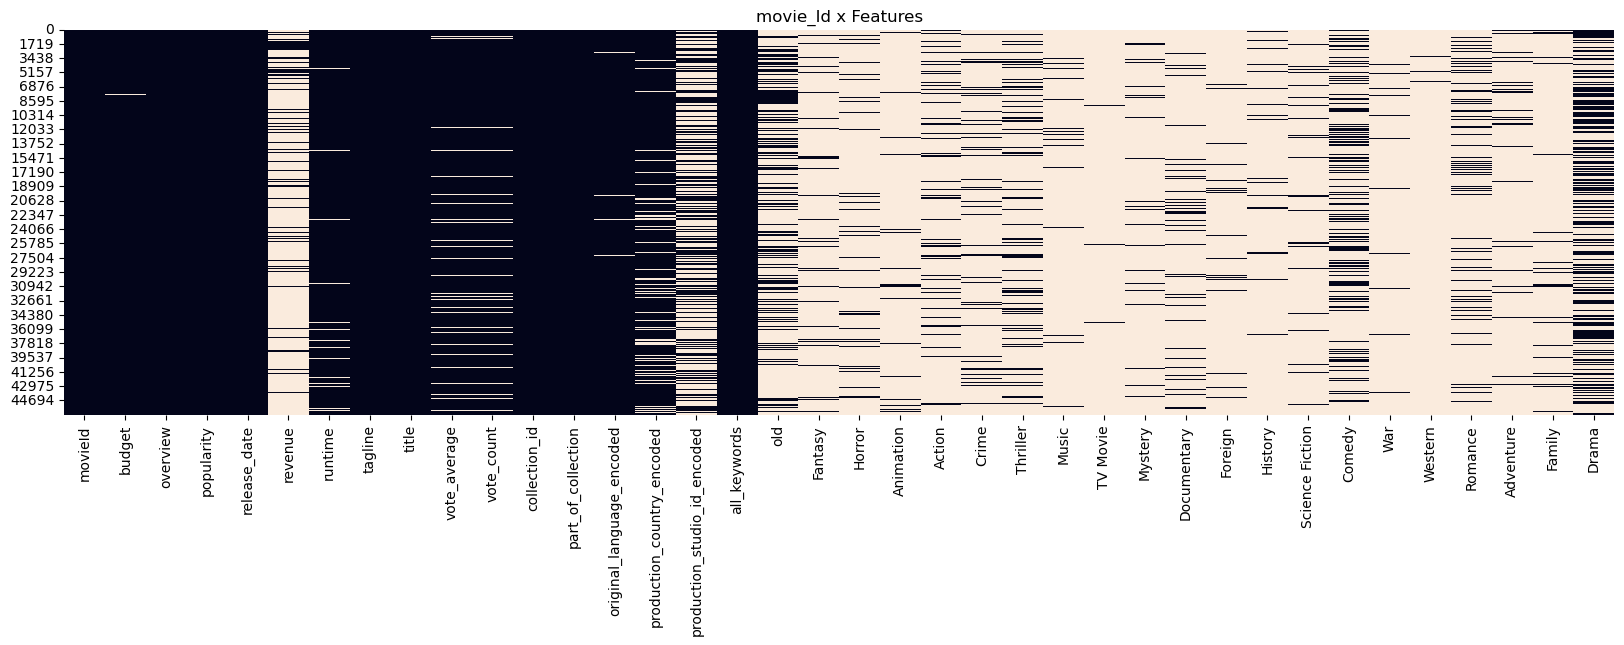

In [81]:
fig, ax = plt.subplots(figsize = (20,5))
sns.heatmap(product_df == 0, vmin = 0, vmax = 1, cbar = False, ax = ax).set_title("movie_Id x Features")
plt.show()

#### It is looking like our revenue column, runtime, vote average and vote_count could use the same treatment as budget. 
#### That way, we can hopefully get some better predictive value from the aforementioned features.
#### For all columns that have no reference data from films sharing it's year, we will fill with column avg.

##### Revenue

In [82]:
product_df['revenue'].where(product_df['revenue'] == 0).count()

38903

In [83]:
# Calculate the average budget for each release date
avg_revenue = product_df.groupby('release_date')['revenue'].mean()

# Replace 0 values in the budget column with the average budget for that release year
product_df['revenue'] = product_df.apply(lambda row: row['revenue'] if row['revenue'] != 0 else avg_revenue[row['release_date']], axis=1)

In [84]:
product_df['revenue'].where(product_df['revenue'] == 0).count()

304

In [85]:
product_df['revenue'] = product_df.apply(lambda row: row['revenue'] if row['revenue'] != 0 else (product_df['revenue'].mean()), axis=1)

In [86]:
product_df['revenue'].where(product_df['revenue'] == 0).count()

0

##### Runtime

In [87]:
product_df['runtime'].where(product_df['runtime'] == 0).count()

1616

In [88]:
# Calculate the average runtime for each release date
avg_runtime = product_df.groupby('release_date')['runtime'].mean()

# Replace 0 values in the runtime column with the average runtime for that release year
product_df['runtime'] = product_df.apply(lambda row: row['runtime'] if row['runtime'] != 0 else avg_runtime[row['release_date']], axis=1)

In [89]:
product_df['runtime'].where(product_df['revenue'] == 0).count()

0

##### Vote Average

In [90]:
product_df['vote_average'].where(product_df['vote_average'] == 0).count()

3088

In [91]:
# Calculate the average vote average for each release date
avg_vote = product_df.groupby('release_date')['vote_average'].mean()

# Replace 0 values in the vote average column with the average vote for that release year
product_df['vote_average'] = product_df.apply(lambda row: row['vote_average'] if row['vote_average'] != 0 else avg_vote[row['release_date']], axis=1)

In [92]:
product_df['vote_average'].where(product_df['vote_average'] == 0).count()

6

In [93]:
product_df['vote_average'] = product_df.apply(lambda row: row['vote_average'] if row['vote_average'] != 0 else (product_df['vote_average'].mean()), axis=1)

In [94]:
product_df['vote_average'].where(product_df['vote_average'] == 0).count()

0

##### Vote Count

In [95]:
# Calculate the average vote count for each release date
avg_vote_count = product_df.groupby('release_date')['vote_count'].mean()

# Replace 0 values in the vote count column with the average vote count for that release year
product_df['vote_count'] = product_df.apply(lambda row: row['vote_count'] if row['vote_count'] != 0 else avg_vote_count[row['release_date']], axis=1)

In [96]:
product_df['vote_count'].where(product_df['vote_count'] == 0).count()

0

##### Budget // some of the columns do not share a release date with other films, so we filled with total average budget here

In [97]:
product_df['budget'].where(product_df['budget'] == 0).count()

193

In [98]:
product_df['budget'] = product_df.apply(lambda row: row['budget'] if row['budget'] != 0 else (product_df['budget'].mean()), axis=1)

In [99]:
product_df['budget'].where(product_df['budget'] == 0).count()

0

#### Let's see our updated data matrix

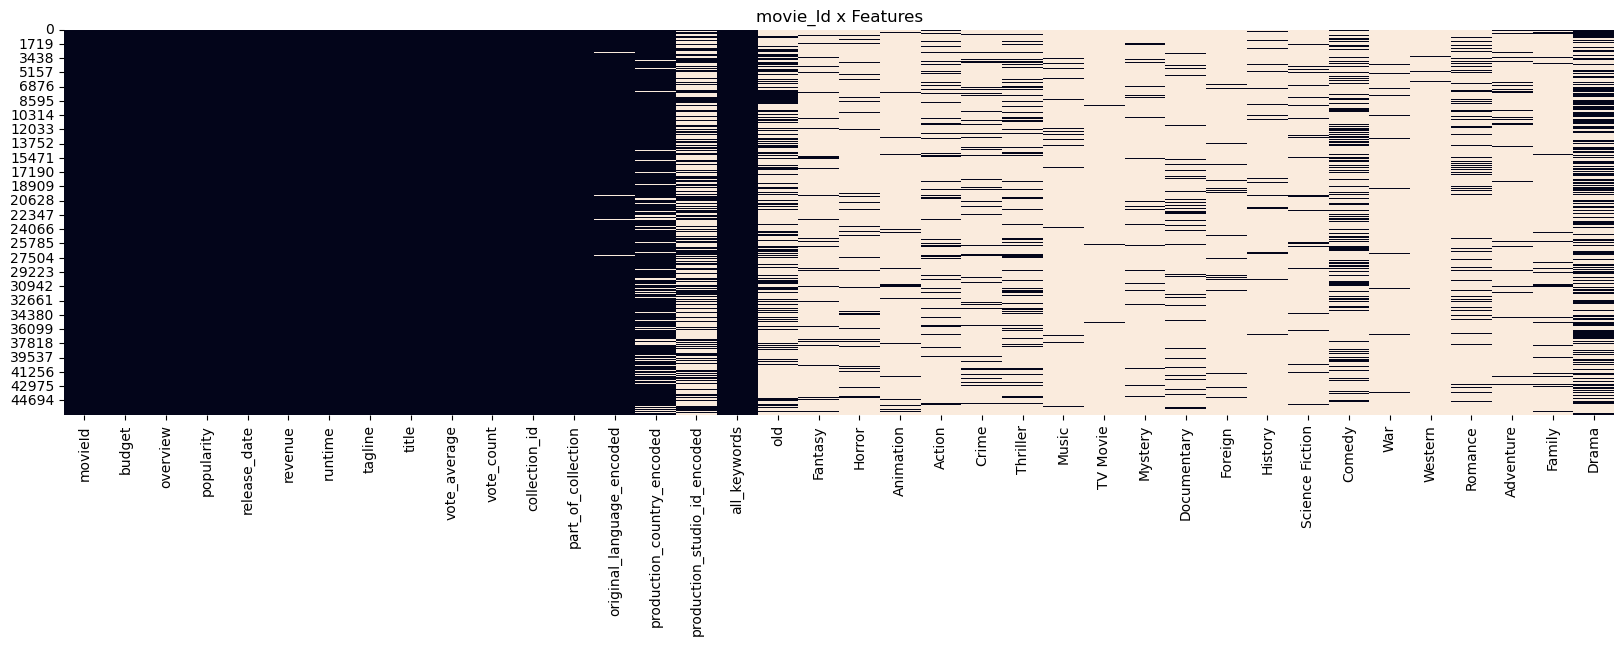

In [100]:
fig, ax = plt.subplots(figsize = (20,5))
sns.heatmap(product_df == 0, vmin = 0, vmax = 1, cbar = False, ax = ax).set_title("movie_Id x Features")
plt.show()

#### Preprocess Outliers using IQR method

In [101]:
product_df['release_date'] = product_df['release_date'].astype(int)
numerical_columns = ['release_date', 'budget', 'popularity', 'revenue', 
                     'runtime', 'vote_average', 'vote_count', 'old', 
                     'Science Fiction', 'Crime', 'Thriller', 'Drama', 
                     'Horror', 'Romance', 'TV Movie', 'Action', 
                     'Adventure', 'War', 'Documentary', 'Family', 
                     'Fantasy', 'Music', 'Animation', 'Mystery', 
                     'Comedy', 'Western', 'Foreign', 'History']

In [102]:
# Define a function to normalize outliers using the IQR method
def normalize_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Replace outliers with the lower or upper bound, as appropriate
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Normalize outliers in the numerical columns
for column in tqdm(numerical_columns):
    data = normalize_outliers_iqr(product_df, column)

100%|██████████| 28/28 [00:00<00:00, 411.06it/s]


#### Lets scale all of our numerical data!

In [103]:
# scaler = preprocessing.MinMaxScaler(feature_range = (0.5, 1))
# product_df[numerical_columns] = scaler.fit_transform(product_df[numerical_columns])
# product_df.head()

In [104]:
product_df

,movieId,budget,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,...,Foreign,History,Science Fiction,Comedy,War,Western,Romance,Adventure,Family,Drama
0,1,1.565299e+07,Led by Woody Andys toys live happily in his ro...,8.457968,1995.0,3.195007e+07,81.0,not available,Toy Story,7.700000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,5.310104e+06,A family wedding reignites the ancient feud be...,8.457968,1995.0,1.376508e+07,101.0,Still Yelling Still Fighting Still Ready for Love,Grumpier Old Men,6.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1.565299e+07,Cheated on mistreated and stepped on the women...,3.859495,1995.0,3.195007e+07,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.100000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,5.310104e+06,Just when George Banks has recovered from his ...,8.387519,1995.0,3.195007e+07,106.0,Just When His World Is Back To Normal Hes In F...,Father of the Bride Part II,5.700000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1.565299e+07,Obsessive master thief Neil McCauley leads a t...,8.457968,1995.0,3.195007e+07,137.0,A Los Angeles Crime Saga,Heat,7.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46395,176269,1.061000e+04,Rising and falling between a man and woman,0.072051,2060.5,1.282051e-01,90.0,Rising and falling between a man and woman,Subdue,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46396,176271,5.734726e+06,An artist struggles to finish his work while a...,0.178241,2011.0,1.419636e+07,137.0,not available,Century of Birthing,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46397,176273,7.284009e+06,When one of her hits goes wrong a professional...,0.903007,2003.0,1.773580e+07,90.0,A deadly game of wits,Betrayal,3.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46398,176275,7.349747e+06,In a small town live two brothers one a minist...,0.003503,1928.5,1.997863e+07,87.0,not available,Satan Triumphant,4.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now, we are going to tokenize and pad all of the text data for our model to get ready to become embeddings

In [105]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [106]:
# print(product_df['overview'][0])

In [107]:
# text_columns = ['overview', 'tagline', 'title', 'all_keywords', 'part_of_collection']
# tokenizer = Tokenizer()
# max_len = 100

# for col in tqdm(text_columns):
#     tokenizer.fit_on_texts(product_df[col])
#     product_df[col] = [pad_sequences(tokenizer.texts_to_sequences(x), maxlen = max_len, padding='post') for x in product_df[col]]
    
# product_df.head()

### Reading in user data, and merging user data with product data

#### Initial formatting, splitting user and movie id, then merging both with features based on product, in this case, our movieId column.

In [108]:
user_train_df = pd.read_csv("train.csv")
print(user_train_df.shape)

user_test_df = pd.read_csv("test.csv")
print(user_test_df.shape)

(70002, 2)
(30002, 1)


In [109]:
user_train_df.head()

,userId_movieId,rating
0,10_1358,0.4
1,237_1544,0.7
2,54_373,1.0
3,11_2053,0.8
4,183_2524,0.6


In [110]:
user_test_df.head()

,userId_movieId
0,469_2124
1,439_3753
2,522_1682
3,429_1217
4,71_1210


In [111]:
user_train_df[['userId','movieId']] = user_train_df['userId_movieId'].str.split('_',expand=True)
user_train_df = user_train_df.astype(float)
                                          
user_test_df[['userId','movieId']] = user_test_df['userId_movieId'].str.split('_',expand=True)
user_test_df = user_test_df.astype(float)


In [112]:
user_train_df = user_train_df.drop(columns = 'userId_movieId', axis = 0)
user_train_df.head()

,rating,userId,movieId
0,0.4,10.0,1358.0
1,0.7,237.0,1544.0
2,1.0,54.0,373.0
3,0.8,11.0,2053.0
4,0.6,183.0,2524.0


In [113]:
user_test_df = user_test_df.drop(columns = 'userId_movieId', axis = 0)
user_test_df.head()

,userId,movieId
0,469.0,2124.0
1,439.0,3753.0
2,522.0,1682.0
3,429.0,1217.0
4,71.0,1210.0


In [114]:
user_train_df = user_train_df.merge(product_df, on = 'movieId', how = 'left')
sub = ['userId', 'movieId']
user_train_df = user_train_df.drop_duplicates(subset = sub)
print(user_train_df.shape)
user_train_df.head()

(70002, 40)


,rating,userId,movieId,budget,overview,popularity,release_date,revenue,runtime,tagline,...,Foreign,History,Science Fiction,Comedy,War,Western,Romance,Adventure,Family,Drama
0,0.4,10.0,1358.0,1.000000e+06,Karl Childers is a mentally disabled man who h...,8.457968,1996.0,2.444412e+07,135.0,A simple man A difficult choice,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.7,237.0,1544.0,1.565299e+07,Four years after Jurassic Parks genetically br...,0.788123,1997.0,3.195007e+07,129.0,Something has survived,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,54.0,373.0,8.000000e+06,When a promised job for Texan Michael fails to...,5.137903,1993.0,2.000000e+06,98.0,Where nothing is as it seems,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.8,11.0,2053.0,1.565299e+07,Wayne Szalinski is at it again But instead of ...,8.457968,1992.0,3.195007e+07,89.0,The BIG Laughs Start January 6th,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,183.0,2524.0,1.400000e+07,At the opening party of a colossal - but poorl...,7.469056,1974.0,3.195007e+07,137.0,The worlds tallest building is on fire You are...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
user_test_df = user_test_df.merge(product_df, on = 'movieId', how = 'left')
sub = ['userId', 'movieId']
user_test_df = user_test_df.drop_duplicates(subset = sub)
print(user_test_df.shape)
user_test_df.head()

(30002, 39)


,userId,movieId,budget,overview,popularity,release_date,revenue,runtime,tagline,title,...,Foreign,History,Science Fiction,Comedy,War,Western,Romance,Adventure,Family,Drama
0,469.0,2124.0,1.565299e+07,Uncle Fester has been missing for 25 years An ...,8.457968,1991.0,3.195007e+07,99.0,Weird Is Relative,The Addams Family,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,439.0,3753.0,1.565299e+07,After proving himself on the field of battle i...,8.457968,2000.0,3.195007e+07,137.0,Some things are worth fighting for,The Patriot,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,522.0,1682.0,1.565299e+07,"Truman Burbank is the star of ""The Truman Show...",8.457968,1998.0,3.195007e+07,103.0,On the air Unaware,The Truman Show,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,429.0,1217.0,1.150000e+07,Set in Japan in the 16th century an elderly w...,8.457968,1985.0,4.069653e+06,137.0,The Greatest Shakespeare Film,Ran,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,71.0,1210.0,1.565299e+07,As Rebel leaders map their strategy for an all...,8.457968,1983.0,3.195007e+07,135.0,The Empire Falls,Return of the Jedi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### more prep

#### Check for Missing Values

In [116]:
# print(f'TRAIN DATASET MISSING VALUES: \n{user_train_df.isna().sum()}')
# print(f'\nTEST DATASET MISSING VALUES: \n{user_test_df.isna().sum()}')

#### Fill missing values in numerical columns with mean of each column, and missing values of text columns by forward filling an embedding

In [117]:
user_train_df.shape[0]

70002

In [118]:
user_train_df[numerical_columns] = user_train_df[numerical_columns].fillna(user_train_df[numerical_columns].mean())
user_test_df[numerical_columns] = user_test_df[numerical_columns].fillna(user_test_df[numerical_columns].mean())

# # def filler_embedding(col):
# #     return np.zeros(100)


# user_train_df[text_columns] = user_train_df[text_columns].fillna(method = 'ffill')
# user_test_df[text_columns] = user_test_df[text_columns].fillna(method = 'ffill')

In [119]:
print(f'TRAIN DATASET MISSING VALUES: \n{user_train_df.isna().sum()}')
print(f'\nTEST DATASET MISSING VALUES: \n{user_test_df.isna().sum()}')

TRAIN DATASET MISSING VALUES: 
rating                              0
userId                              0
movieId                             0
budget                              0
overview                          222
popularity                          0
release_date                        0
revenue                             0
runtime                             0
tagline                           222
title                             222
vote_average                        0
vote_count                          0
collection_id                   48026
part_of_collection                222
original_language_encoded         222
production_country_encoded        222
production_studio_id_encoded      222
all_keywords                      222
old                                 0
Fantasy                             0
Horror                              0
Animation                           0
Action                              0
Crime                               0
Thriller           

In [120]:
# user_train_df[text_columns] = user_train_df[text_columns].apply(lambda x: x.explode())
# user_test_df[text_columns] = user_test_df[text_columns].apply(lambda x: x.explode())

In [121]:
genre_columns =     ['Science Fiction', 'Crime', 'Thriller', 'Drama', 
                     'Horror', 'Romance', 'TV Movie', 'Action', 
                     'Adventure', 'War', 'Documentary', 'Family', 
                     'Fantasy', 'Music', 'Animation', 'Mystery', 
                     'Comedy', 'Western', 'Foreign', 'History']
for col in tqdm(genre_columns):
    try:
        user_train_df[genre_columns] = user_train_df[genre_columns].astype(int)
        user_test_df[genre_columns] = user_test_df[genre_columns].astype(int)
    except ValueError:
        pass

100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


#### Save Data to CSV as checkpoint

In [122]:
user_train_df.to_csv('checkpoint_train.csv', encoding = 'utf-8', index = False)
user_test_df.to_csv('checkpoint_test.csv', encoding = 'utf-8', index = False)